# Find songs for all files of a bird (or a day of a bird)

In [1]:
#notebook for testing the search of song in a wav file
## Load everything
%matplotlib inline
import pdb
import sys
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import math
import scipy as sp
import socket
import os
import logging
import glob

matplotlib.style.use('ggplot')

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

# Set up Computer and paths
comp_name=socket.gethostname()
logger.info('Computer: ' + comp_name)

if 'passaro' in comp_name or 'txori' in comp_name:
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')
    raw_data_folder = os.path.join(experiment_folder, 'raw_data')
    ss_data_folder = os.path.join(experiment_folder, 'ss_data')
    
#grab soundtools
from swissknife.streamtools import findsong
from swissknife.bci.core import expstruct as et
import swissknife.streamtools.findbout as fb
from swissknife.threadtools.threadedfunction import threadedFunction

2018-01-14 23:13:00,141 root         INFO     Computer: txori


In [2]:
bird_id = 'z052'
sess_day = '2018-01-14'
rec = '06-00-01-12'
raw_location = 'rw'
raw_data_folder_bird = et.file_names(bird_id)['folders'][raw_location]

In [3]:
def list_flatten(lists):
    return [t for sublist in lists for l in sublist for t in l]

def all_bird_sessions(raw_folder):
    return list(os.walk(raw_folder))[0][1]

def all_day_wavs(day_folder):
    return glob.glob(os.path.join(day_folder, '*.wav'))

def get_day_files(raw_data_folder_bird, day):
    day_path = os.path.join(raw_data_folder_bird, day)
    logger.info('Getting all wav names for day {}'.format(day_path))
    all_wavs = all_day_wavs(day_path)
    return all_wavs

def get_bird_files(raw_data_folder_bird, only_days=None):
    if only_days:
        all_days = only_days
    else:
        all_days = all_bird_sessions(raw_data_folder_bird)
    all_bird_files = [get_day_files(raw_data_folder_bird, day) for day in all_days]
    return [x for sublist in all_bird_files for x in sublist]


In [4]:
only_days = [sess_day]
raw_file_list = get_bird_files(raw_data_folder_bird, only_days=only_days)
all_raw_file_list = [x for x in raw_file_list if 'autobouts' not in x]
all_raw_file_list.sort()

2018-01-14 23:13:07,290 root         INFO     Getting all wav names for day /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14


In [5]:
raw_file_path = all_raw_file_list[-1]
raw_path, raw_fname = os.path.split(raw_file_path)
raw_path.replace('raw_data', 'ss_data')

IndexError: list index out of range

In [ ]:
all_raw_file_list

In [ ]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_song_that_day.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

### Find the bouts for all the files

In [ ]:
#Parameters of the search
bit_size = 50 # ms; size of sound bits
refractory = 5 # bits; refractory period in bits
bits_bout = 2 # bits; how many bouts together is considered a bout
threshold = 20 # threshold in mads (median deviation of the median)

#The band where we expect most of the energy of zf song to be in
filt_lo = 10000 #Hz
filt_hi = 300 #Hz
found_songs = []
for raw_file_path in all_raw_file_list:
    raw_path, raw_fname = os.path.split(raw_file_path)
    ss_path = raw_path.replace('raw_data', 'ss_data')
    et.mkdir_p(ss_path)
    bout_file_path = os.path.join(ss_path, 
                                  '{}_auto.wav'.format(raw_fname.split('.')[0]))
    found = findsong.get_all_bouts(raw_file_path, bout_file_path=bout_file_path, 
                       bit_size=bit_size, refractory=refractory, bits_bout=bits_bout,
                           threshold=threshold, filt_lo=filt_lo, filt_hi=filt_hi)
    found_songs.append(found)

2018-01-14 23:12:17,469 bci.core.expstruct DEBUG    Creating directory /mnt/cube/earneodo/bci_zf/ss_data/z052/2018-01-14
2018-01-14 23:12:17,472 bci.core.expstruct DEBUG    Directory existed, doing nothing
2018-01-14 23:12:17,473 findsong     INFO     Will get bouts for file /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-01.wav
2018-01-14 23:12:17,476 streamtools.streams INFO     wavdata
2018-01-14 23:12:48,589 findsong     WARNING  Could not get bouts, maybe file is corrupted? Returning error
2018-01-14 23:12:48,591 bci.core.expstruct DEBUG    Creating directory /mnt/cube/earneodo/bci_zf/ss_data/z052/2018-01-14
2018-01-14 23:12:48,594 bci.core.expstruct DEBUG    Directory existed, doing nothing
2018-01-14 23:12:48,595 findsong     INFO     Will get bouts for file /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-02.wav
2018-01-14 23:12:48,597 streamtools.streams INFO     wavdata


In [ ]:
from importlib import reload
reload(findsong)

found = findsong.get_all_bouts_dbg(raw_file_path, bout_file_path=bout_file_path, 
                       bit_size=bit_size, refractory=refractory, bits_bout=bits_bout,
                           threshold=threshold, filt_lo=filt_lo, filt_hi=filt_hi)

In [ ]:
found

### search motif


In [5]:
all_days = all_bird_sessions(raw_data_folder_bird)
all_days.sort()
len(all_days)

2

In [6]:
all_days[:]

['2018-01-13', '2018-01-14']

In [7]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_bout_one_day_mot_1.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

/mnt/cube/earneodo/bci_zf/raw_data/z052/search_bout_one_day_mot_1.log


In [8]:
def search_bouts_song(bird, sess, stim_name, stim_ver='001'):
    fn = et.file_names(bird, stim_ver)
    stim_par = et.read_yml(os.path.join(fn['folders']['stim'], 'stim.par.yml'))
    
    search_par = stim_par['search_motiff']
    pattern_path = os.path.join(fn['folders']['stim'], search_par['motiff_patterns'][stim_name])
    
    fn_data = et.file_names(bird, sess)
    stream_folder = fn_data['folders']['rw']
    dest_folder = fn_data['folders']['ss']
    et.mkdir_p(dest_folder)
    
    log_f_name = os.path.join(dest_folder, 'search_bout_{}.log'.format(stim_name))
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    fh = logging.FileHandler(log_f_name)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    
    all_candidates = fb.search_bouts_sess(stream_folder, pattern_path, search_par, 
                                          chunked_specgram=False)
    logger.info('Done collecting all candidates for all files in the folder')
    all_candidates = fb.collect_bouts_waveforms(all_candidates, pattern_path, border_samples=3000)
    all_candidates.to_pickle(os.path.join(dest_folder, '{}_match_cand.pickle'.format(stim_name)))
    logger.info('Saved file, nothing more to do')
    logger.removeHandler(fh)
    fh.flush()
    fh.close()
    return all_candidates

#sess_cand = search_bouts_song(bird_id, all_days[0], 'motiff_1')

In [9]:
plt.plot(all_candidates.waveform.tolist()[22][3000:-3000])

NameError: name 'all_candidates' is not defined

2018-01-14 23:13:38,556 bci.core.expstruct DEBUG    Creating directory /mnt/cube/earneodo/bci_zf/ss_data/z052/2018-01-13
2018-01-14 23:13:38,571 swissknife.streamtools.findbout INFO     will search for pattern in all waves of folder /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13
2018-01-14 23:13:38,573 swissknife.streamtools.findbout INFO     found 28 wav files
2018-01-14 23:13:38,574 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-01.wav
2018-01-14 23:13:52,662 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-14 23:13:52,664 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-14 23:13:53,360 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-14 23:13:53,734 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-14 23:13:53,736 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01

2018-01-14 23:25:49,578 swissknife.streamtools.findbout INFO     Clustering candidates
2018-01-14 23:25:49,580 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-14 23:25:49,608 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-14 23:25:49,623 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-14 23:25:49,626 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-14 23:25:49,629 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-05.wav
2018-01-14 23:26:01,098 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-14 23:26:01,099 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-14 23:26:01,236 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-14 23:26:01,

2018-01-14 23:37:54,662 swissknife.streamtools.findbout INFO     Found 2 candidates
2018-01-14 23:37:54,664 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-14 23:37:54,667 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-14 23:37:54,671 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-09.wav
2018-01-14 23:38:06,120 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-14 23:38:06,121 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-14 23:38:06,260 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-14 23:38:06,395 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-14 23:38:06,396 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-14 23:38:06,397 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-14

2018-01-14 23:50:20,085 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-14 23:50:20,220 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-14 23:50:20,221 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-14 23:50:20,222 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-14 23:50:20,234 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-14 23:50:51,611 swissknife.streamtools.findbout INFO     Getting all scores in 360680 points
2018-01-14 23:50:51,613 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-14 23:53:12,310 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-14 23:53:12,312 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-14 23:53:12,315 swissknife.streamtools.findbout INFO     126 peaks found
2018-01-14 23:53:12,326 swissknife.streamtools.findbout INFO     124 peaks left 

2018-01-15 00:02:16,506 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 00:02:16,509 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-17.wav
2018-01-15 00:02:28,778 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 00:02:28,780 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 00:02:29,137 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 00:02:29,402 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 00:02:29,403 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 00:02:29,404 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 00:02:29,417 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-15 00:02:59,011 swissknife.streamtools.findbout INFO     Getting all scores in 360680 poin

2018-01-15 00:14:33,068 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-15 00:14:33,071 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 00:14:33,074 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-21.wav
2018-01-15 00:14:45,108 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 00:14:45,110 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 00:14:45,323 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 00:14:45,464 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 00:14:45,466 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 00:14:45,467 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 00:14:45,479 swissknife.streamtools.findbout INFO     Getting stream spectrogram
20

2018-01-15 00:26:58,189 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 00:26:58,203 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-15 00:26:58,208 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 00:26:58,213 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-13/06-00-01-25.wav
2018-01-15 00:27:09,214 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 00:27:09,215 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 00:27:09,354 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 00:27:09,492 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 00:27:09,493 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 00:27:09,494 swissknife.streamtools.findbout IN

2018-01-15 00:39:10,930 swissknife.streamtools.findbout INFO     Found 45 correlation peaks
2018-01-15 00:39:10,930 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324261853937
2018-01-15 00:39:10,933 swissknife.streamtools.findbout INFO     Found 45 candidates
2018-01-15 00:39:10,933 swissknife.streamtools.findbout INFO     Clustering candidates
2018-01-15 00:39:10,934 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 00:39:10,954 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 00:39:10,968 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-15 00:39:10,970 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 00:39:11,013 root         INFO     Done collecting all candidates for all files in the folder
2018-01-15 00:39:11,019 swissknife.streamtools.findbout INFO     Will collect the wavefo

2018-01-15 00:48:37,832 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 00:48:37,833 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 00:48:37,971 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 00:48:38,110 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 00:48:38,111 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 00:48:38,112 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 00:48:38,123 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-15 00:49:08,500 swissknife.streamtools.findbout INFO     Getting all scores in 360680 points
2018-01-15 00:49:08,502 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-15 00:51:29,969 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-15 00:51:29,972 swissknife.streamtools.findbout

2018-01-15 01:00:38,541 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 01:00:38,556 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-15 01:00:38,567 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 01:00:38,571 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-08.wav
2018-01-15 01:00:47,626 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 01:00:47,627 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 01:00:47,767 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 01:00:47,902 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 01:00:47,903 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 01:00:47,904 swissknife.streamtools.findbout IN

2018-01-15 01:12:41,158 swissknife.streamtools.findbout INFO     Found 64 correlation peaks
2018-01-15 01:12:41,159 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324261853937
2018-01-15 01:12:41,161 swissknife.streamtools.findbout INFO     Found 64 candidates
2018-01-15 01:12:41,162 swissknife.streamtools.findbout INFO     Clustering candidates
2018-01-15 01:12:41,163 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 01:12:41,181 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 01:12:41,196 swissknife.streamtools.findbout DEBUG    Returning clustered candidates
2018-01-15 01:12:41,200 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 01:12:41,205 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-12.wav
2018-01-15 01:12:50,853 swissknife.s

2018-01-15 01:22:21,015 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-15 01:24:43,402 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-15 01:24:43,405 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-15 01:24:43,408 swissknife.streamtools.findbout INFO     206 peaks found
2018-01-15 01:24:43,425 swissknife.streamtools.findbout INFO     192 peaks left after filtering redundant
2018-01-15 01:24:43,426 swissknife.streamtools.findbout INFO     Found 192 correlation peaks
2018-01-15 01:24:43,428 swissknife.streamtools.findbout DEBUG    actual dt 0.0009977324261853937
2018-01-15 01:24:43,430 swissknife.streamtools.findbout INFO     Found 192 candidates
2018-01-15 01:24:43,431 swissknife.streamtools.findbout INFO     Clustering candidates
2018-01-15 01:24:43,432 swissknife.streamtools.findbout INFO     Attempting to cluster bout candidates by spectrogram similarity
2018-01-15 01:24:43,476 swissknife.streamtools.

2018-01-15 01:33:55,507 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 01:33:55,508 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 01:33:55,511 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 01:33:55,522 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-15 01:34:21,499 swissknife.streamtools.findbout INFO     Getting all scores in 360680 points
2018-01-15 01:34:21,501 swissknife.streamtools.findbout INFO     done collecting scores
2018-01-15 01:36:41,244 swissknife.streamtools.findbout INFO     Getting spectrogram correlation peaks
2018-01-15 01:36:41,246 swissknife.streamtools.findbout INFO     Finding peaks ...
2018-01-15 01:36:41,249 swissknife.streamtools.findbout INFO     29 peaks found
2018-01-15 01:36:41,254 swissknife.streamtools.findbout INFO     26 peaks left after filtering redundant
2018-01-15 01:36:41,255 swissknife.streamtools.findbout INFO     Found 26 cor

2018-01-15 01:45:26,076 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-23.wav
2018-01-15 01:45:35,026 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 01:45:35,027 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 01:45:35,163 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 01:45:35,300 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 01:45:35,301 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 01:45:35,302 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 01:45:35,314 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-15 01:46:00,228 swissknife.streamtools.findbout INFO     Getting all scores in 360680 points
2018-01-15 01:46:00,230 swissknife.streamtools.findbout INFO     done collecting scores
2

2018-01-15 01:57:02,593 swissknife.streamtools.findbout INFO     Returning candidates panda
2018-01-15 01:57:02,597 swissknife.streamtools.findbout INFO     searching for pattern in /mnt/cube/earneodo/bci_zf/raw_data/z052/2018-01-14/06-00-01-27.wav
2018-01-15 01:57:11,551 swissknife.streamtools.findbout INFO     79380000 samples loaded at 44100 Hz
2018-01-15 01:57:11,552 swissknife.streamtools.findbout INFO     Calling find_the_bouts
2018-01-15 01:57:11,687 swissknife.streamtools.findbout INFO     Begin to get scores (rms, env_corr)
2018-01-15 01:57:11,822 swissknife.streamtools.findbout INFO     Getting the spectral scores
2018-01-15 01:57:11,823 swissknife.streamtools.findbout DEBUG    No chunked specgram
2018-01-15 01:57:11,824 swissknife.streamtools.findbout INFO     Getting pattern spectrogram
2018-01-15 01:57:11,836 swissknife.streamtools.findbout INFO     Getting stream spectrogram
2018-01-15 01:57:36,945 swissknife.streamtools.findbout INFO     Getting all scores in 360680 poin

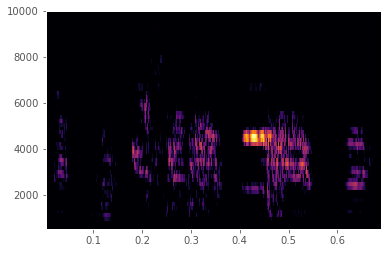

In [10]:
all_sess_cand = []
for d in all_days[-2:]:
    sess_cand = search_bouts_song(bird_id, d, 'motiff_1')
    all_sess_cand.append(sess_cand)

## run a thread with search in many sessions
- The sessions are in all_days

#### Create a log, if you may

In [ ]:
# create file handler which logs even debug messages
log_f_name = os.path.join(raw_data_folder_bird, 'search_bout_many_days.log')
fh = logging.FileHandler(log_f_name)
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(fh)
print(log_f_name)

In [ ]:
[all_days[-1]]

In [ ]:
def find_bout_list(bird_id, sess_list, pattern_name):
    sess_cand_list = [search_bouts_song(bird_id, s, pattern_name) for s in sess_list]
    return pd.concatenate(sess_cand_list)

the_long_search = threadedFunction(args=(find_bout_list, bird_id, [all_days[-1]], 'motiff_1'))
the_long_search.start()


## Debugging and all that jizz

In [ ]:
import swissknife.streamtools.findbout as fb
reload(et)
reload(fb)
reload(sp)

stim_ver = '001'

fn = et.file_names(bird_id, stim_ver)

stim_par = et.read_yml(os.path.join(fn['folders']['stim'], 'stim.par.yml'))

search_par = stim_par['search_motiff']
stim_names = list(search_par['motiff_patterns'].keys())
print(stim_names)
stim_name = 'motiff_0'

search_par['corr_thresh'] = 0.5
search_par['db_cut'] = 60
pattern_path = os.path.join(fn['folders']['stim'], search_par['motiff_patterns'][stim_name])
#stream_path = all_raw_file_list[-10]
#stream_path = '/mnt/cube/earneodo/bci_zf/raw_data/z036/2017-08-06/06-00-01-23.wav'
stream_path = one_file
#stream_path = os.path.join('/mnt/cube/earneodo/bci_zf/ss_data/z036/2017-07-10', '06-00-02-11_auto.wav')
candy = fb.search_bouts(stream_path, pattern_path, search_par, chunked_specgram=False, debug=True)


In [ ]:
candy[1].plot(subplots=True)

In [ ]:
allcand = map(lambda x: fb.search_bouts(x, pattern_path, search_par, chunked_specgram=False), all_raw_file_list[0:2])

In [ ]:
pd_cand.to_pickle?

In [ ]:
pd_cand = pd.concat(allcand)

In [ ]:
stream_path = '/mnt/cube/earneodo/bci_zf/raw_data/z036/2017-08-06/06-00-01-23.wav'

In [ ]:
candy['file'] = stream_path

In [ ]:
candy

In [ ]:
pat =WavData(stream_path)
alpat = Chunk(pat).data.flatten()

In [ ]:
for start in candy.start.tolist():
    plt.figure()
    plt.plot(alpat[start:start+30000])

In [ ]:
alpat.samples

In [ ]:
list(search_par['motiff_patterns'].keys())

In [ ]:
fn